## Introduction Linear regression development


#### Classsification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib notebook

In [2]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

In [3]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

## Linear regression 

One of the most widely used models for regression is known as linear regression. This asserts
that the response is a linear function of the inputs. This can be written as follows

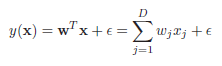

linear regression and Gaussians

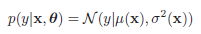

Linear regression can be made to model non-linear relationships by replacing x with some non-linear function of the inputs, φ(x).

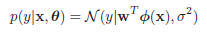

A common way to esitmate the parameters of a statistical model is to compute the MLE, which
is defined as

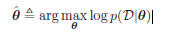

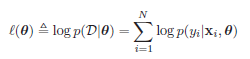

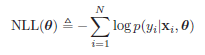

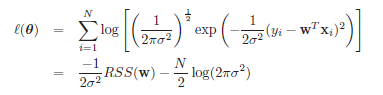

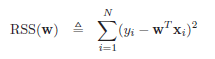

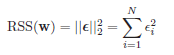

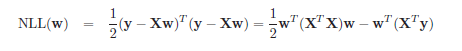

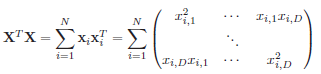

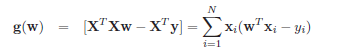

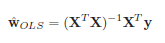

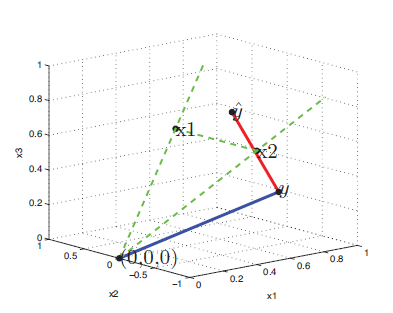

### Selecting the Best Model

if our estimator is underperforming, how
should we move forward?

* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample

### Overfitting and Underfitting

In [4]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

#### Bias-Variance Tradeoff

Fundamentally, the question of “the best model” is about finding a sweet spot in the
trade-off between bias and variance.

The model on the left attempts to find a straight-line fit through the data. Because the
data are intrinsically more complicated than a straight line, the straight-line model
will never be able to describe this dataset well. Such a model is said to underit the
data; that is, it does not have enough model flexibility to suitably account for all the
features in the data. Another way of saying this is that the model has high bias.

The model on th right is said to overit the data; that is, it has so much model flexibility that the
model ends up accounting for random errors as well as the underlying data distribution.
Another way of saying this is that the model has high variance.

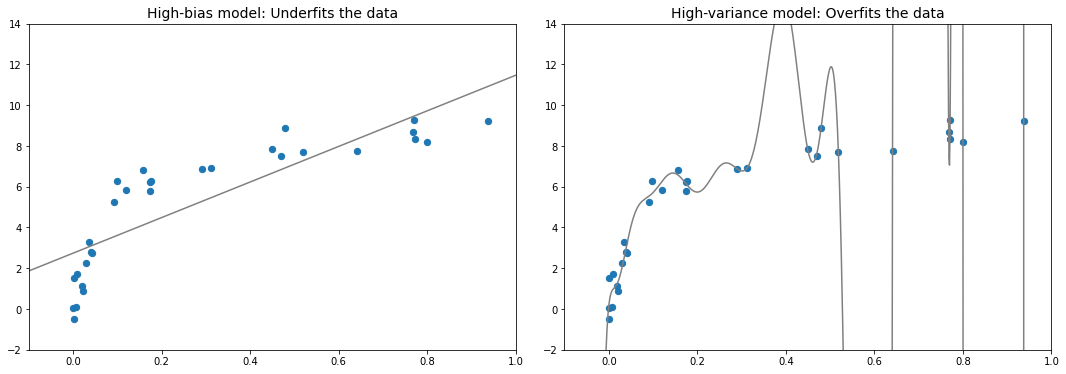

In [6]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

fig.savefig('figures/05.03-bias-variance.png')

#### Bias-Variance Tradeoff Metrics

Text(0.02, 0.91, 'validation score: $R^2$ = -1.8e+09')

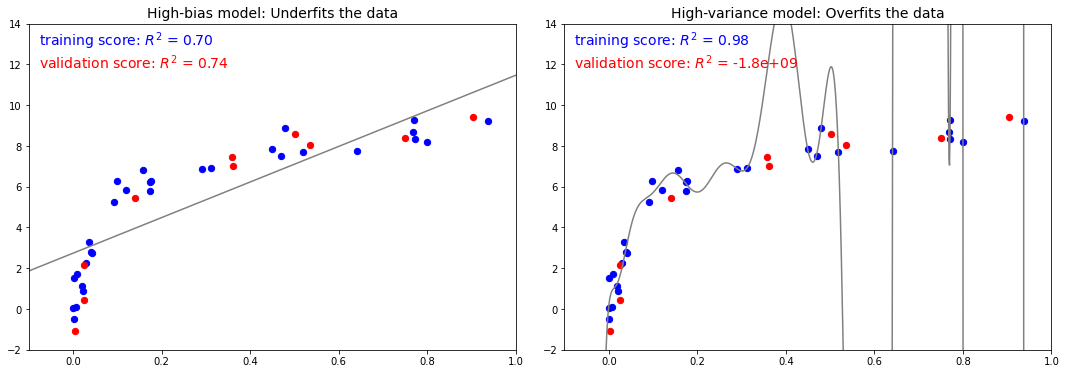

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')



#### Validation Curve

Text(0.5, 1.0, 'Validation Curve Schematic')

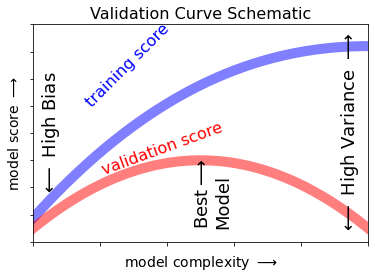

In [8]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)



In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
LinearRegression(**kwargs))

In [10]:
import numpy as np
def make_data(N, err=1.0, rseed=1):

    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

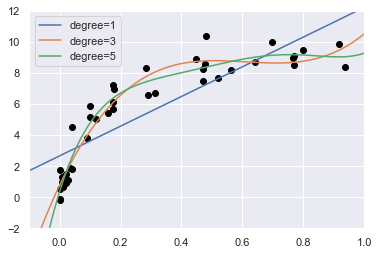

In [13]:

import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    plt.xlim(-0.1, 1.0)
    plt.ylim(-2, 12)
    plt.legend(loc='best')
    
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0, 0.5, 'score')

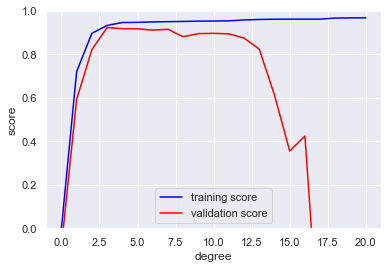

In [14]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

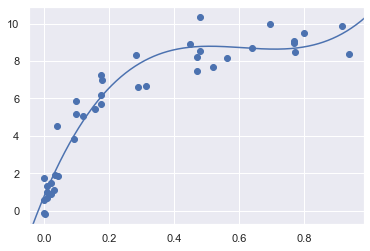

In [15]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim)
plt.show()

#### Learning Curve

One important aspect of model complexity is that the optimal model will generally
depend on the size of your training data.

Text(0.5, 1.0, 'Learning Curve Schematic')

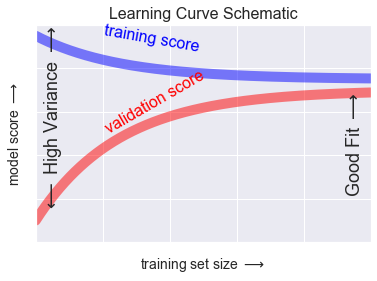

In [16]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
ax.plot(x, y2, lw=10, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)


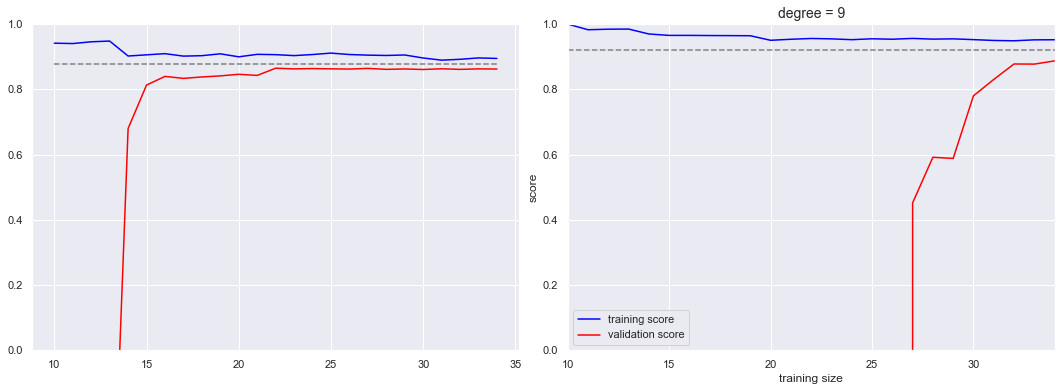

In [17]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
    X, y, cv=7,
    train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
    linestyle='dashed')
    ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc='best')

### K -Fold Cross Validation

__Why
just
choose
one
par&cular
“split”
of
the
data?__

– In
principle,
we
should
do
this
mul&ple
&mes
since
performance
may
be
different
for
each
split

k-­‐Fold
Cross-­‐Validation
(e.g.,
k=10)

– randomly
partition
full
data
set
of
n
instances
into
k
disjoint
subsets
(each
roughly
of
size
n/k)

– Choose
each
fold
in
turn
as
the
test
set;
train
model
on
the
other
folds
and
evaluate

– Compute
statistics
over
k
test
performances,
or
choose
best
of
the
k
models

– Can
also
do
“leave-­‐one-­‐out
CV” where
k
=
n

Cross-­‐validation
generates
an
approximate
es&mate
of
how
well
the
classifier
will
do
on
“unseen” data

Averaging
over
different
par&&ons
is
more
robust
than
just
a
single
train/validate
par&&on
of
the
data

#### Regulariation

A
method
for
automaJcally
controlling
the
complexity
of
the
learned
hypothesis

Idea:
penalize
for
large
values
of

– Can
incorporate
into
the
cost
funcJon

– Works
well
when
we
have
a
lot
of
features,
each
that
contributes
a
bit
to
predicting
the
label

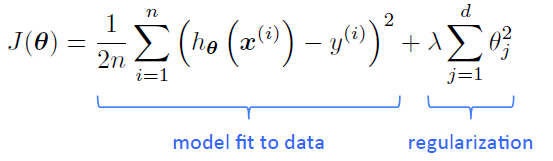

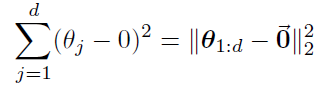

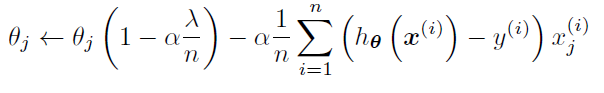

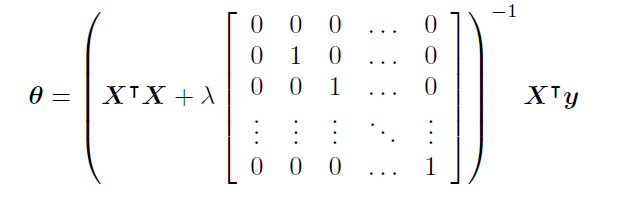

## Coding the linear regressions

__Task 1.__
Generates num_points random numbers from a uniform distribution.

In [24]:
def generate_x_vec(xmin, xmax, num_points):
    x_vec = np.random.rand(num_points)*(xmax - xmin) + xmin
    return np.matrix(x_vec).T

In [25]:
def linear_regression(X,Y):
    X = np.matrix(X) # nxm maatrix 
    Y = np.matrix(Y) # nx1 matrix
    beta = (X.T*X).I*X.T*Y # mx1 matrix
    return beta

In [26]:
def generate_points(x_vec, sigma, beta_star):
    y =  x_vec *beta_star
    y_star = np.random.normal(y, sigma)
    beta_hat = linear_regression(x_vec, y_star)
    return y_star, beta_hat

__Task 3.__ Now write a function plot_lines plots the red line, the green line and blue dots in one plot.

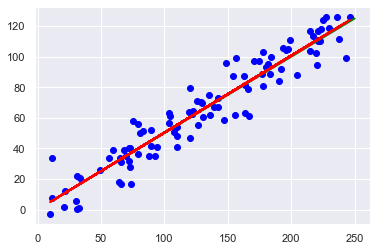

In [28]:
# add the code
xmax = 10
xmin = 250
beta_star = 0.5
num_points = 100
sigma = 10

x_line = generate_x_vec(xmin,xmax,num_points)
x_star =np.linspace(xmin,xmax,num_points).T
y_line = beta_star * x_star
data =  generate_points(x_line, sigma, beta_star)
y_dots = data[0]
y_fit = x_line * data[1]
plt.plot(x_line, y_dots, 'ro', color="blue")
plt.plot(x_star, y_line, linewidth=2, color="green")
plt.plot(x_line, y_fit, linewidth=2, color="red")
plt.show()

__Task 4.__ Now write a function **plot_lines** that generates the blue dots many times and plots all the red lines in one plot.

In [29]:
def plot_lines(beta_star, num_trials, xmin, xmax, num_points, sigma):

    for _ in np.arange(num_trials):
        x = generate_x_vec(xmin, xmax, num_points)
        y_star,  beta_fit = generate_points(x,  sigma, beta_star)
        
        y_fit =  x * beta_fit
        plt.plot(x, y_star, 'ro', color = 'blue')
        plt.plot(x, y_fit, 'red')
        epsilon = (y_fit - y_star)
         
    
    x_true = np.linspace(xmin, xmax, num = num_points).T
    y_true = beta_star * x_true
    plt.plot(x_true, y_true, 'green', linewidth = 4)
    plt.show()

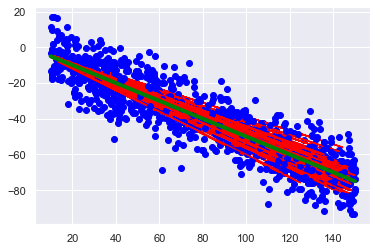

In [31]:
plot_lines(-0.5, 100, 10., 150., 10, 10)

__Part 5.__ your x vector is a 1D vector but for polynomial you need to create a matrix XX that contains many degrees of the inputs x. For this we will write a function transform_x that will take a vector x** and return a matrix **X for the d-degree polynomial regression.

In [32]:
from numpy.linalg import inv
def linear_regression(X,Y):
    return inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

In [33]:
def generate_x_vec(xmin, xmax, num_points):
        return np.random.uniform(xmin,xmax,num_points)

In [34]:
def generate_points_polynomial(x_vec, sigma, d_star, d_train, beta_star):
    y_star = []
    x_matrix = transform_x(x_vec, d_star)
    for row in x_matrix:
        y_star.append(np.random.normal(row.dot(beta_star), sigma))
    x_matrix = transform_x(x_vec, d_train)
    beta_hat = linear_regression(x_matrix, y_star)
    return (y_star, beta_hat)

In [35]:
def transform_x(x,d):
    return np.column_stack([x**i for i in range(d + 1)])

__Part 6.__ Write function generate_points_polynomial which will generate the y_star values for the points we have in x_vec. y_star will be generating using the green line, that is, beta_star.
Hint: if you construct the right matrix X** then **y_star1 will be X.dot(beta_star) ... well almost, remember that y_star should have some randomness - so y_star = np.random.normal(y_star1, sigma) - this will add some randomness.

Now you have your blue dots and it is time to perform regression on them. Make sure you give the correct X to the linear regression function and you will receive your beta_hat.

The difference from the simple case is that you have two more function variables - d_star and d_train. d_star is the degree of the polynomial that represents the real function - the green line. d_train on the other hand, the degree of the polynomials we are using for our regression. Think about the relationship of d_star, beta_star, d_train, and beta_hat.

In [36]:
def plot_lines(beta_star, d_star, d_train, num_trials, xmin, xmax, num_points, sigma):
    x_vec_plot = np.arange(xmin, xmax, (xmax - xmin)/100)
    x_matrix_star = transform_x(x_vec_plot, d_star)
    x_matrix_hat = transform_x(x_vec_plot, d_train)
    y_star = x_matrix_star.dot(beta_star)
    plt.plot(x_vec_plot, y_star, linewidth=2, color="green")
    
    x_vec = generate_x_vec(xmin, xmax, num_points)
    
    for i in range(num_trials):
        y_star, beta_hat = generate_points_polynomial(x_vec, sigma, d_star, d_train, beta_star)
        if i == 0:
            plt.scatter(x_vec, y_star)
        y_hat_plot = x_matrix_hat.dot(beta_hat)
        plt.plot(x_vec_plot, y_hat_plot, linewidth=2, color="red")
    if d_train == 9 and num_points == 30:
         plt.axis([xmin, xmax, -500, 2500])
    else:
        plt.axis([xmin, xmax, xmin, xmax])
    plt.show()

__Part 7.__ write **plot_lines_polynomial** that will do the work to generate the points and plot the lines.

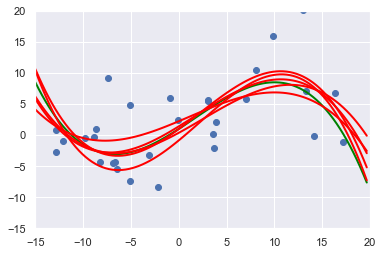

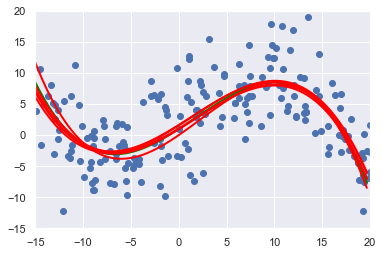

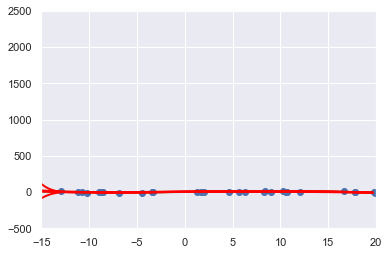

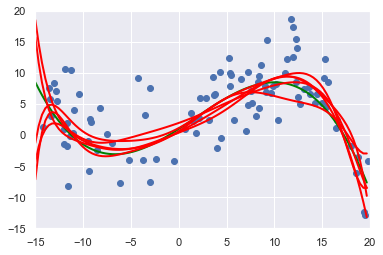

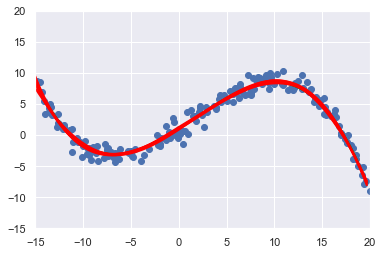

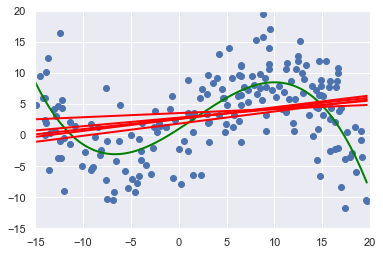

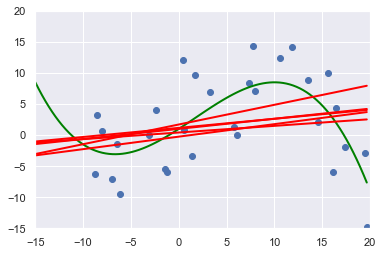

In [37]:
num_trials = 5
beta_star = [1, 1, 0.025, - 0.005]
d_star = 3
d_train = 3
d_train2 = 9
d_train3 = 1
plot_lines(beta_star, d_star, d_train, num_trials, -15, 20,30, 5)
plot_lines(beta_star, d_star, d_train, num_trials, -15, 20,200, 5)
plot_lines(beta_star, d_star, d_train2, num_trials, -15, 20,30, 5)
plot_lines(beta_star, d_star, d_train2, num_trials, -15, 20,100, 5)
plot_lines(beta_star, d_star, d_train2, num_trials, -15, 20,200, 1)
plot_lines(beta_star, d_star, d_train3, num_trials, -15, 20,200, 5)
plot_lines(beta_star, d_star, d_train3, num_trials, -15, 20,30, 5)

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

__Part 8.__

- here x is the vector of inputs you have generated

- trans vector is a python list of functions. Each function determines how you compute the ith column of matrix X

- for example [lambda x: 1, lambda x: x, lambda x: x**2] is the equivalent for second degree regression

In [151]:
def linear_regression(X,Y):
    return inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)

In [152]:
def generate_x_vec(xmin, xmax, num_points):
        return np.random.uniform(xmin,xmax,num_points)

In [153]:
def transform_universal(x, trans_vector):
    result = np.empty([0, len(trans_vector)])
    for i in x:
        row = []
        for lam in trans_vector:
            row.append(lam(i))
        result = np.row_stack([result, row])
    return result
#     return np.row_stack([trans_vector[i](x) for i in range(len(trans_vector))])

__Part 9.__ define a function same as the polynomial, but now instead of just d_star and d_train we have trans_vec_star and trans_vec_train which  are vectors of functions

In [154]:
def generate_points_universal(x_vec, sigma, trans_vec_star, beta_star, trans_vec_train):
    y_star = []
    x_matrix = transform_universal(x_vec, trans_vec_star)
    for row in x_matrix:
        y_star.append(np.random.normal(row.dot(beta_star), sigma))
    x_matrix = transform_universal(x_vec, trans_vec_train)
    beta_hat = linear_regression(x_matrix, y_star)
    return (y_star, beta_hat)

__Part 10.__ define a function same as plot_lines but for this case

In [38]:
def plot_lines(beta_star, trans_vec_star, trans_vec_train, num_trials, xmin, xmax, num_points, sigma):
    x_vec_plot = np.arange(xmin, xmax, (xmax - xmin)/100)
    x_matrix_star = transform_universal(x_vec_plot, trans_vec_star)
    x_matrix_hat = transform_universal(x_vec_plot, trans_vec_train)
    y_star = x_matrix_star.dot(beta_star)
    plt.plot(x_vec_plot, y_star, linewidth=2, color="green")
    
    x_vec = generate_x_vec(xmin, xmax, num_points)
    for i in range(num_trials):
        y_star, beta_hat = generate_points_universal(x_vec, sigma, trans_vec_star, beta_star, trans_vec_train)
        if i == 0:  
            plt.scatter(x_vec, y_star)
        y_vec = x_matrix_hat.dot(beta_hat)
        plt.plot(x_vec_plot, y_vec, linewidth=2, color="red")
    plt.axis([xmin, xmax, -5, 15])
    plt.show()
    

In [39]:
trans_vector_train = [lambda x: 1, lambda x: x, lambda x: x**2,lambda x: x**3, lambda x: np.sin(x)]
trans_vector_star = [lambda x: 1, lambda x: x, lambda x: x**2,lambda x: x**3, lambda x: np.sin(x)]
beta_star = np.array([1, -0.3 , 0.05, -0.001 , 1])
num_trials = 5
xmin = -10
xmax = 43
num_points = 50
sigma = 2
plot_lines(beta_star, trans_vector_star, trans_vector_train, num_trials, -10, 43,50, 2)

NameError: name 'transform_universal' is not defined

# Regularization, Feature Scaling and Cross Validation

The program consists of two parts that interact with each other. We will call these parts the **teacher** and the **student**. 
Fhe **teacher** picks a **beta_star** vector, that corresponds to some green polynomial line and generates points around it with standard deviation **sigma**. The techer calls these points **x_1**, and **y_1** where x_1 and y_1 are vectors. The teacher also generates another set of points called **x_2** and **y_2**. The techer is going to give **x_1** and **y_1** for the student to learn and also gives **x_2**, BUT NOT **y_2** to the student to test the output.


The **student**, takes the **x_1** and **y_1** values of the points but does not know the degree of the polynomial the teacher used. The **student** has just learned regularization and wants to use that in this problem. That's why instead of trying multiple values for **d_train** the student decides to use **ONLY** **d_train** = 9 and use **lambda** to see if he can avoid overfitting using regularization. The student also knows, that because he wants his regularization to work well, then he needs to scale and standardize his data. To do so, when the student constructs the **X** matrix with polynomial degrees, he then does features scaling to get a new matrix **X_scaled**. To do so, the student calculates the mean and standard deviation (**mu** and **sigma**) for each COLUMN of **X** and does feature scaling as learned in class.

There is another question, however, how do you choose **lambda** ? The student decides that he will try multiple values for **lambda** and see which one will give him the best cross validation score. He will use **k** fold cross validation with **num_trials** random shufflings of the data, and determine the **BEST** lambda to use for the regression. When he determins the best **lambda** he will use that **lambda** to train the model on the entire **x_1**, **y_1** dataset and then apply the result on the **x_2** do determine **y_2_predicted** and return that to the teacher. The student will also print out cross validation scores for many values of the **lambda**.

Extra: the student realizses, that since he used feature scaling, the **beta_hat** he received at the end will be meaningless for the teacher. Because teacher's coordinate system is different. Can the student find a way to construct **beta_hat_for_techer** using the **beta_hat** which will make sense to the teacher? 


After the teacher receives the **y_2_predicted**, the techer will compare that to **y_2** to see how well the student learned.








In [40]:
%config IPCompleter.greedy=True

import numpy as np
import matplotlib.pyplot as plt



In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [42]:
def transform_x(x, d):
    return np.column_stack([x**i for i in range(d+1)])

In [43]:
def linear_regression(X,Y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [44]:
def generate_x_vec(xmin, xmax, num_points):
        return np.random.uniform(xmin,xmax,num_points)

In [45]:
def fit_best_polynomial(x,y,k,num_trials,max_degree=10):  
    min_rror = -10
    best_degree = 0
    costs = dict()
    for degree in range(max_degree + 1):
        error = cross_validation(x, y, degree, k, num_trials)
        costs.update({degree: error})
        if min_rror < 0 or error < min_rror:
            min_rror = error
            best_degree = degree
    return costs

In [46]:
def generate_points_polynomial(xmin, xmax, num_points, sigma,  beta_star, d_star):
    x_vec = generate_x_vec(xmin, xmax, num_points)
    y_star = []
    x_matrix = transform_x(x_vec, d_star)
    for row in x_matrix:
        y_star.append(np.random.normal(row.dot(beta_star), sigma))
    return (x_vec, y_star)

In [47]:
def cross_validation (x,y,d, k, num_trials):
    k_count = 1
    trial_number = 0
    error_list = []
    while trial_number < num_trials:
        extended_matrix = transform_x(x, d)
        extended_matrix = np.column_stack((extended_matrix, y))
        np.random.shuffle(extended_matrix)
        while k_count <= k:
            x_matrix = extended_matrix[:, :extended_matrix.shape[1] - 1]
            y = extended_matrix[:, extended_matrix.shape[1] - 1:]
            
            test_data_size = x_matrix.shape[0]//k
            
            train_x = np.row_stack((x_matrix[:test_data_size*(k_count - 1),:], x_matrix[test_data_size*(k_count):,:]))
            train_y = np.row_stack((y[:test_data_size*(k_count - 1),:], y[test_data_size*(k_count):,:]))
            test_xs = x_matrix[test_data_size*(k_count - 1):test_data_size*k_count,:]
            test_ys = y[test_data_size*(k_count - 1):test_data_size*k_count,:]
            
            beta_hat = linear_regression(train_x, train_y).flatten()
            for idx, row in enumerate(test_xs):
                error_list.append((beta_hat.dot(row) - test_ys[idx])**2)
            k_count += 1
        trial_number += 1
    return np.average(error_list)

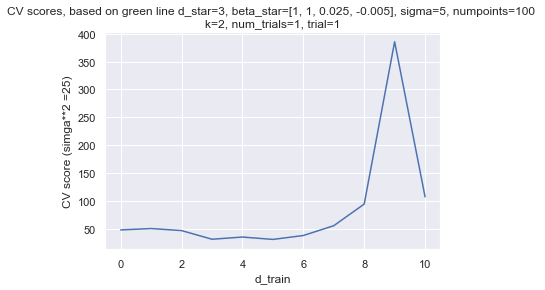

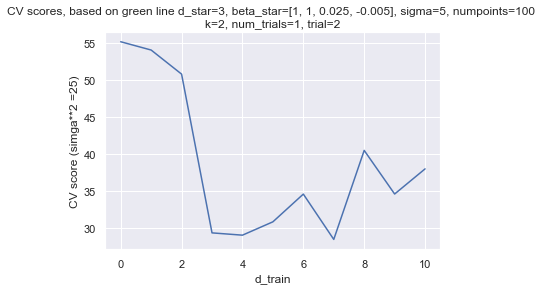

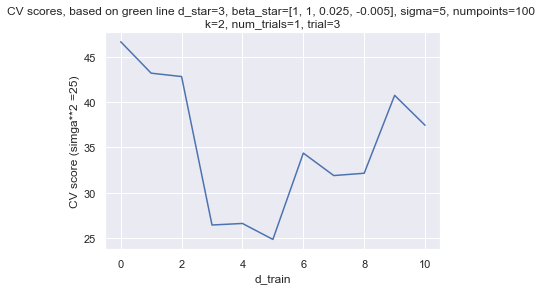

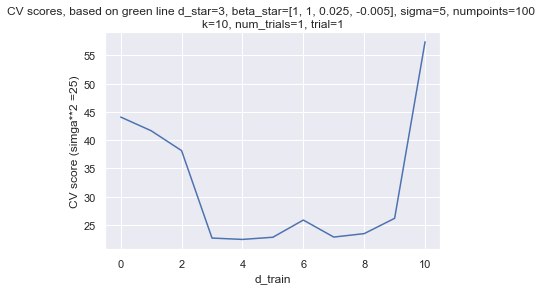

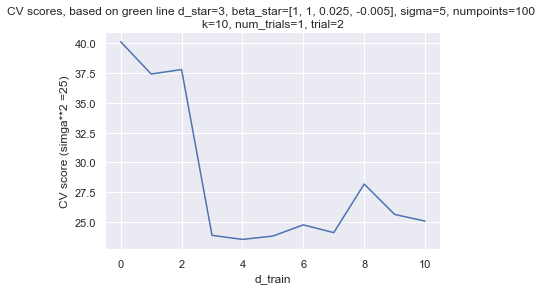

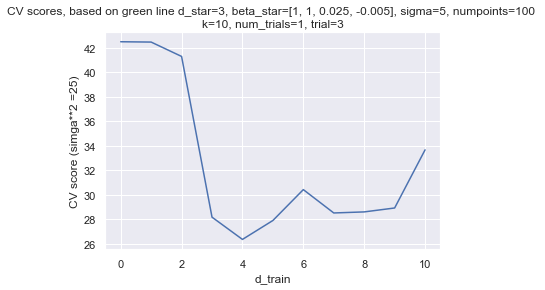

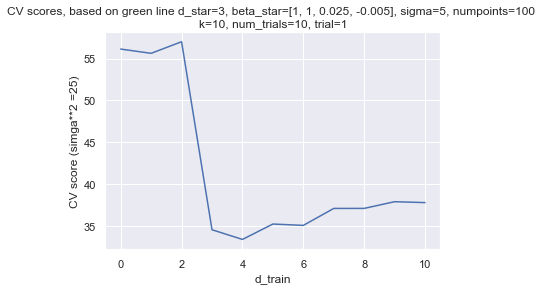

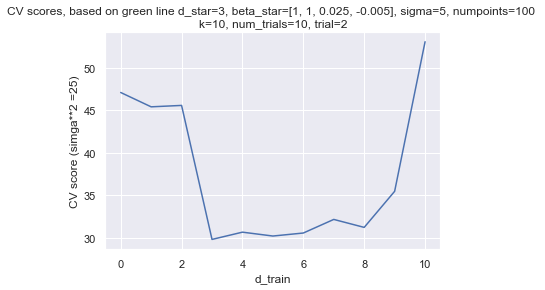

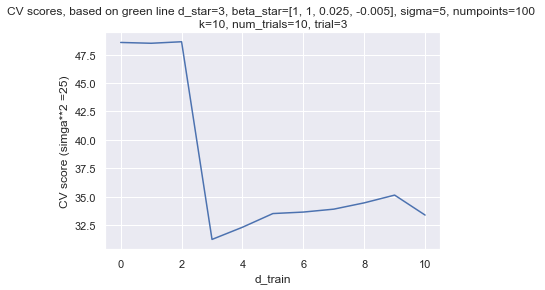

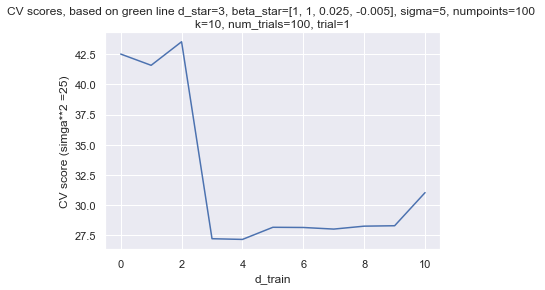

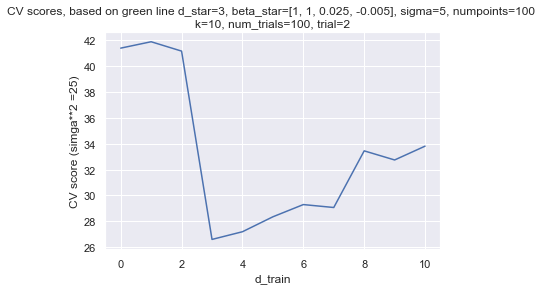

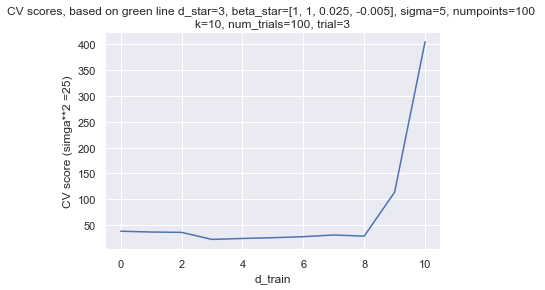

In [48]:
xmin = -15
xmax = 20
num_points = 100
sigma = 5
d_star = 3
beta_star = [1, 1, 0.025, - 0.005]

li = [(2,1),(10,1),(10,10),(10,100)]

for (k,num_trials) in li:
    for trial in range(3):
        x,y = generate_points_polynomial(xmin, xmax, num_points, sigma,  beta_star, d_star)
        scores = fit_best_polynomial(x,y,k,num_trials)
        plt.plot(scores.keys(),scores.values())
        plt.title("CV scores, based on green line d_star=%s, beta_star=%s, sigma=%s, numpoints=%s \nk=%s, num_trials=%s, trial=%s" % (d_star,beta_star,sigma, num_points,k,num_trials,trial+1))
        plt.xlabel("d_train")
        plt.ylabel("CV score (simga**2 =%s)" % sigma**2)
        plt.show()



# Regularization, Feature Scaling and Cross Validation

In [49]:
%config IPCompleter.greedy=True

import numpy as np
import matplotlib.pyplot as plt

In [50]:
def transform_x(x, d):
    return np.column_stack([x**i for i in range(d+1)])

In [51]:
def linear_regression(X,Y,lam):
    n = X.shape[1]
    return np.linalg.inv(X.T.dot(X) + lam*np.row_stack((np.zeros(n) ,np.column_stack((np.zeros(n - 1),np.eye(n - 1)))))).dot(X.T).dot(Y)

In [52]:
def generate_x_vec(xmin, xmax, num_points):
        return np.random.uniform(xmin,xmax,num_points)

In [53]:
def generate_points_polynomial(xmin, xmax, num_points, sigma,  beta_star, d_star):
    x_vec = generate_x_vec(xmin, xmax, num_points)
    y_star = []
    x_matrix = transform_x(x_vec, d_star)
    for row in x_matrix:
        y_star.append(np.random.normal(row.dot(beta_star), sigma))
    return (x_vec, y_star) 

In [54]:
def feature_scale_train(X):
    mu_vec = [0]
    sigma_vec = [1]
    result = X[:,:]
    for i in np.arange(start=1, stop=X.shape[1]):
        mu_vec.append(np.average(X[:, i]))
        sigma_vec.append(np.std(X[:, i]))
        result[:, i] = (X[:, i] - np.average(X[:, i]))/np.std(X[:, i])
    return result, mu_vec, sigma_vec

In [55]:
def feature_scale_test(X, mu_vec, sigma_vec):
    for i in np.arange(start=1, stop=X.shape[1]):
        X[:, i] = (X[:, i] - mu_vec[i])/sigma_vec[i]
    return X

### Student

In [56]:
def fit_best_polynomial(x,y,x_2,d=3):
    scores = {}
    manual_lambdas = [0.0001,0.001,0.01,0.1,10]
    for lam in manual_lambdas:
        scores[lam] = cross_validation(x,y,lam)
        print("CV Score for lam =",lam, "equals", scores[lam])
    
    begin = 0
    end = 10
    eps=0.1
    while end-begin>eps:
        lam=end
        end = end/1.5
        score = cross_validation(x,y,lam)
        print("Current CV score for lam=",lam,"equals",score)
        scores[lam] = score
    a = sorted(scores.items())
    
    best_lam = min(scores, key=scores.get)
    print("Best lambda is", best_lam, "with a score", scores[best_lam])
    
#     get predicted y_2
    x_matrix = transform_x(x, d)
    x_scaled, x_mu, x_sigma = feature_scale_train(np.matrix.copy(x_matrix))
    beta_scaled = linear_regression(x_scaled, y, best_lam)
    
#     make x_matrix square
    n = x_matrix.shape[0]
    m = x_matrix.shape[1]
    if x_matrix.shape[0] < x_matrix.shape[1]:
        while x_matrix.shape[0] != x_matrix.shape[1]:
            x_vec = generate_x_vec(10,100,m)
            x_matrix = np.row_stack((x_matrix, x_vec))
    if m < n:
        x_matrix = x_matrix[:m, :]
        x_scaled = x_scaled[:m, :]
    beta_hat = np.linalg.inv(x_matrix).dot(x_scaled.dot(beta_scaled))
    
    x_2_matrix = transform_x(x_2, d)
    return x_2_matrix.dot(beta_hat), scores


In [57]:
def cross_validation (x,y,lam, k=10, num_trials=100):
    k_count = 1
    trial_number = 0
    error_list = []
    while trial_number < num_trials:
        extended_matrix = transform_x(x, 3)
        extended_matrix = np.column_stack((extended_matrix, y))
        np.random.shuffle(extended_matrix)
        while k_count <= k:
            x_matrix = extended_matrix[:, :extended_matrix.shape[1] - 1]
            y = extended_matrix[:, extended_matrix.shape[1] - 1:]
            
            test_data_size = x_matrix.shape[0]//k
            
            train_x = np.row_stack((x_matrix[:test_data_size*(k_count - 1),:], x_matrix[test_data_size*(k_count):,:]))
            train_y = np.row_stack((y[:test_data_size*(k_count - 1),:], y[test_data_size*(k_count):,:]))
            test_xs = x_matrix[test_data_size*(k_count - 1):test_data_size*k_count,:]
            test_ys = y[test_data_size*(k_count - 1):test_data_size*k_count,:]
            
            train_x_scaled, x_mu, x_sigma = feature_scale_train(train_x)
            beta_scaled = linear_regression(train_x_scaled, train_y, lam).flatten()
            
           #     As we know that for any x X.dot(beta_hat) = X_scaled.dot(beta_scaled), we will first make our x_matrix 
#     square. If the rows are more than the columns, we will remove some rows. Otherwise, we will add some custom rows,
#     then do feature scaling using the mean and sigma we have already used to get our beta_sclaed.
#     And having the square x_matrix and x_scaled, using the inverse of x_matrix we can easily calculate ur beta_hat for the teacher

            n = x_matrix.shape[0]
            m = x_matrix.shape[1]
            if x_matrix.shape[0] < x_matrix.shape[1]:
                while x_matrix.shape[0] != x_matrix.shape[1]:
                    x_vec = generate_x_vec(10,100,m)
                    x_matrix = np.row_stack((x_matrix, x_vec))
            if m < n:
                x_matrix = x_matrix[:m, :]
            x_scaled = feature_scale_test(np.matrix.copy(x_matrix), x_mu, x_sigma)
            beta_hat = np.linalg.inv(x_matrix).dot(x_scaled.dot(beta_scaled))
            for idx, row in enumerate(test_xs):
                error_list.append((beta_hat.dot(row) - test_ys[idx])**2)
            k_count += 1
        trial_number += 1
    return np.average(error_list)

In [58]:
def plot_lines(x,y,d,lam,d_star=3,xmin=-15, xmax =20, beta_star = [1, 1, 0.025, - 0.005]):
        X = transform_x(x,d)
        X_scaled, mu, sigma = feature_scale_train(X)
        beta_hat_scaled = linear_regression(X_scaled, y, lam)
        print("Beta_hat_scaled =",beta_hat_scaled)
        beta_hat = beta_hat_scaled/sigma
        beta_hat[0] = beta_hat_scaled[0]-np.sum(beta_hat_scaled*mu/sigma)
        print("Beta_hat =",beta_hat)
        
        x_l = np.linspace(xmin,xmax,100)
        X_l = transform_x(x_l,d)
        y_l = X_l.dot(beta_hat)
        X_l_2 = transform_x(x_l,d_star)
        y_l_2 = X_l_2.dot(beta_star)
        
#         fig = plt.figure()
#         pl = fig.add_subplot(1,1,1)
        plt.scatter(x,y, color="blue")
        plt.plot(x_l,y_l, color="red", linewidth=3)
        plt.plot(x_l,y_l_2, color="green", linewidth=3)
        plt.show()
        print("#############################################")
        print("#############################################")
        print("#############################################")
        print("\n")
        print("\n")
        print("\n")

CV Score for lam = 0.0001 equals 2.867747307287521
CV Score for lam = 0.001 equals 2.767774245736994
CV Score for lam = 0.01 equals 2.793138613517601
CV Score for lam = 0.1 equals 2.869164858221347
CV Score for lam = 10 equals 13.414008613456293
Current CV score for lam= 10 equals 13.493974695789069
Current CV score for lam= 6.666666666666667 equals 11.329164437933269
Current CV score for lam= 4.444444444444445 equals 9.27151027114397
Current CV score for lam= 2.9629629629629632 equals 6.557297433633563
Current CV score for lam= 1.9753086419753088 equals 5.668669945393726
Current CV score for lam= 1.316872427983539 equals 3.9818673510481304
Current CV score for lam= 0.877914951989026 equals 3.3214468908735855
Current CV score for lam= 0.5852766346593506 equals 3.2035477554470346
Current CV score for lam= 0.39018442310623375 equals 3.018935021902763
Current CV score for lam= 0.26012294873748915 equals 2.8429079320787634
Current CV score for lam= 0.1734152991583261 equals 2.8348223494603

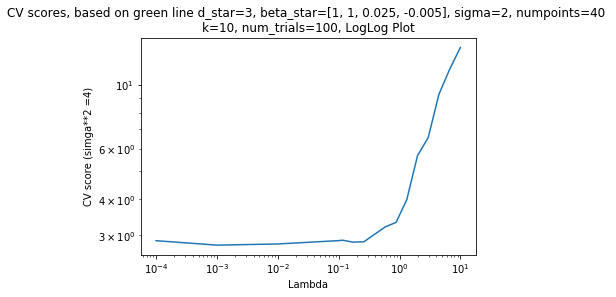

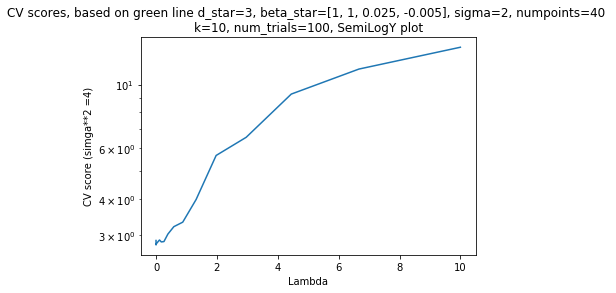



Best lambda is 0.001 with a score 2.767774245736994






CV Score for lam = 0.0001 equals 6.162538379101113
CV Score for lam = 0.001 equals 6.002787249176632
CV Score for lam = 0.01 equals 6.254862571476392
CV Score for lam = 0.1 equals 6.363253140237857
CV Score for lam = 10 equals 15.796378323265504
Current CV score for lam= 10 equals 14.387444896206887
Current CV score for lam= 6.666666666666667 equals 14.625398339377872
Current CV score for lam= 4.444444444444445 equals 10.764394294367866
Current CV score for lam= 2.9629629629629632 equals 9.188527457619205
Current CV score for lam= 1.9753086419753088 equals 8.558162439290774
Current CV score for lam= 1.316872427983539 equals 8.35387659450237
Current CV score for lam= 0.877914951989026 equals 6.921438974377168
Current CV score for lam= 0.5852766346593506 equals 6.17904374002632
Current CV score for lam= 0.39018442310623375 equals 6.787500273824873
Current CV score for lam= 0.26012294873748915 equals 6.773578087799248
Current CV 

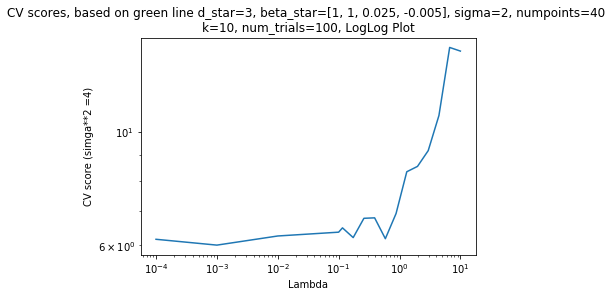

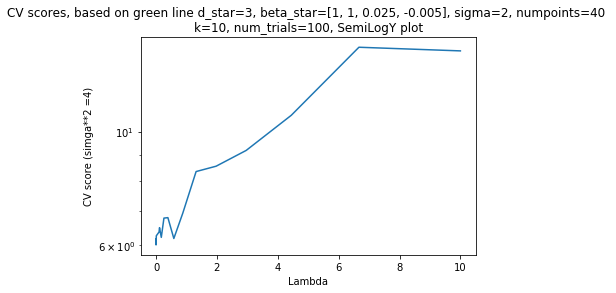



Best lambda is 0.001 with a score 6.002787249176632






CV Score for lam = 0.0001 equals 22.07812777667711
CV Score for lam = 0.001 equals 21.253634846003976
CV Score for lam = 0.01 equals 21.859257721065084
CV Score for lam = 0.1 equals 22.054352390151344
CV Score for lam = 10 equals 25.319172660058562
Current CV score for lam= 10 equals 24.315002050229065
Current CV score for lam= 6.666666666666667 equals 23.998090754042618
Current CV score for lam= 4.444444444444445 equals 23.108964619633724
Current CV score for lam= 2.9629629629629632 equals 23.421634946978536
Current CV score for lam= 1.9753086419753088 equals 22.928972619637015
Current CV score for lam= 1.316872427983539 equals 21.577359720307328
Current CV score for lam= 0.877914951989026 equals 23.15730882092565
Current CV score for lam= 0.5852766346593506 equals 21.065960230632605
Current CV score for lam= 0.39018442310623375 equals 22.192531363770165
Current CV score for lam= 0.26012294873748915 equals 21.392793907138064


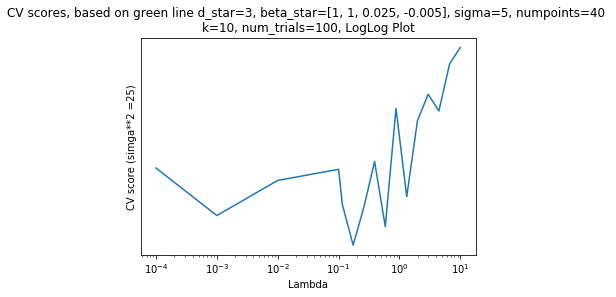

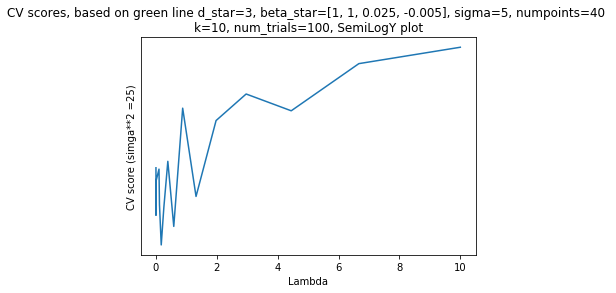



Best lambda is 0.1734152991583261 with a score 20.755921866027208






CV Score for lam = 0.0001 equals 36.26006452563159
CV Score for lam = 0.001 equals 39.31031903901866
CV Score for lam = 0.01 equals 37.64761011708056
CV Score for lam = 0.1 equals 39.86345553794772
CV Score for lam = 10 equals 51.256752695460726
Current CV score for lam= 10 equals 49.53654027715719
Current CV score for lam= 6.666666666666667 equals 49.047969553673
Current CV score for lam= 4.444444444444445 equals 46.1988568025201
Current CV score for lam= 2.9629629629629632 equals 40.75131672403563
Current CV score for lam= 1.9753086419753088 equals 39.85403209010764
Current CV score for lam= 1.316872427983539 equals 39.44915592841978
Current CV score for lam= 0.877914951989026 equals 38.43768875311087
Current CV score for lam= 0.5852766346593506 equals 37.145819311334925
Current CV score for lam= 0.39018442310623375 equals 36.852127196586466
Current CV score for lam= 0.26012294873748915 equals 34.05371258424425

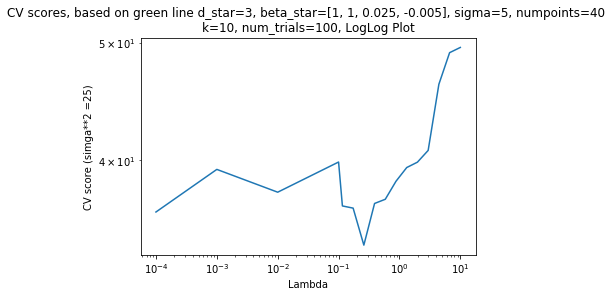

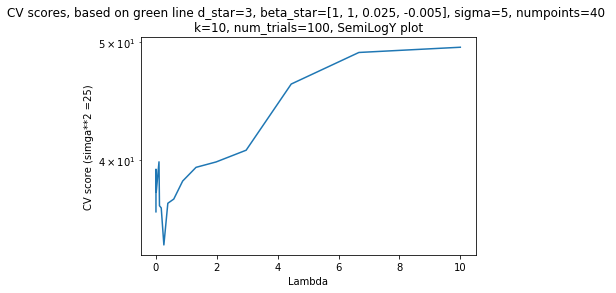



Best lambda is 0.26012294873748915 with a score 34.05371258424425






CV Score for lam = 0.0001 equals 25.887146595017693
CV Score for lam = 0.001 equals 25.52885244856201
CV Score for lam = 0.01 equals 25.333618686563145
CV Score for lam = 0.1 equals 26.24780602120791
CV Score for lam = 10 equals 30.238158771367143
Current CV score for lam= 10 equals 29.888967103689264
Current CV score for lam= 6.666666666666667 equals 28.633306239104787
Current CV score for lam= 4.444444444444445 equals 26.926008726611617
Current CV score for lam= 2.9629629629629632 equals 26.694571704015797
Current CV score for lam= 1.9753086419753088 equals 26.040772399000762
Current CV score for lam= 1.316872427983539 equals 25.862225874119087
Current CV score for lam= 0.877914951989026 equals 25.821811590589437
Current CV score for lam= 0.5852766346593506 equals 25.87010914562282
Current CV score for lam= 0.39018442310623375 equals 26.004467574328764
Current CV score for lam= 0.26012294873748915 equals 25.901

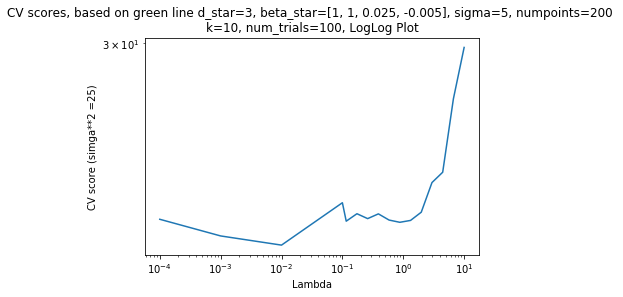

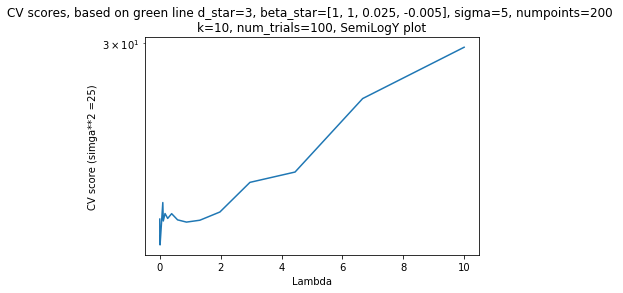



Best lambda is 0.01 with a score 25.333618686563145






CV Score for lam = 0.0001 equals 28.485707615935997
CV Score for lam = 0.001 equals 28.45848798471544
CV Score for lam = 0.01 equals 28.25867877664837
CV Score for lam = 0.1 equals 28.10638404698003
CV Score for lam = 10 equals 31.10860345369235
Current CV score for lam= 10 equals 31.126572641302328
Current CV score for lam= 6.666666666666667 equals 30.795230320630317
Current CV score for lam= 4.444444444444445 equals 29.55206723856387
Current CV score for lam= 2.9629629629629632 equals 28.705099021342136
Current CV score for lam= 1.9753086419753088 equals 28.270049131503065
Current CV score for lam= 1.316872427983539 equals 28.40069596365202
Current CV score for lam= 0.877914951989026 equals 28.138721268216912
Current CV score for lam= 0.5852766346593506 equals 28.265782570658885
Current CV score for lam= 0.39018442310623375 equals 28.602139672592962
Current CV score for lam= 0.26012294873748915 equals 28.242770440771555
Curr

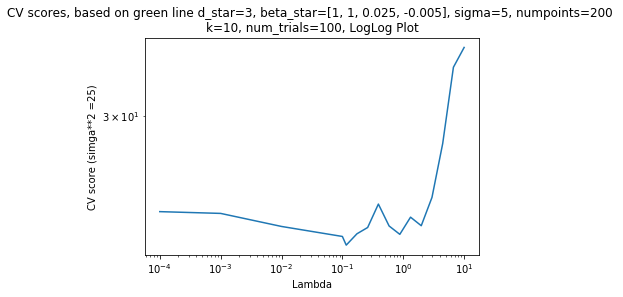

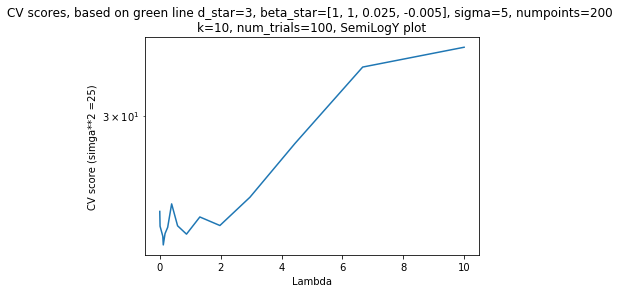



Best lambda is 0.11561019943888406 with a score 27.975337643499497








In [16]:
xmin = -15
xmax = 20
d_star = 3 
beta_star = [1, 1, 0.025, - 0.005]
sigma = 2
num_points = 40
li = [(40,2), (40,2), (40,5), (40,5), (200,5), (200,5)]

for num_points, sigma in li:
    x_1, y_1 = generate_points_polynomial(xmin, xmax, num_points, sigma,  beta_star, d_star)
    x_2, y_2 = generate_points_polynomial(xmin, xmax, num_points, sigma,  beta_star, d_star)
    y_2_predicted, scores = fit_best_polynomial(x_1, y_1, x_2)
    a = sorted(scores.items())
    xx,yy = zip(*a)
    plt.loglog(xx, yy)
    plt.title("CV scores, based on green line d_star=%s, beta_star=%s, sigma=%s, numpoints=%s \nk=10, num_trials=100, LogLog Plot" % (d_star,beta_star,sigma, num_points,))
    plt.xlabel("Lambda")
    plt.ylabel("CV score (simga**2 =%s)" % sigma**2)
    plt.show()
    
    
    plt.semilogy(xx,yy)
    plt.title("CV scores, based on green line d_star=%s, beta_star=%s, sigma=%s, numpoints=%s \nk=10, num_trials=100, SemiLogY plot" % (d_star,beta_star,sigma, num_points,))
    plt.xlabel("Lambda")
    plt.ylabel("CV score (simga**2 =%s)" % sigma**2)
    plt.show()
    best_lam = min(scores, key=scores.get)
    print("\n")
    print("Best lambda is", best_lam, "with a score", scores[best_lam])
    print("\n")
    print("\n")
    print("\n")

